In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cx_Oracle

In [2]:
def get_data_from_db(query):
    conn = cx_Oracle.connect('hoseo', 'hoseo', 'localhost:1521/xe')
    df = pd.read_sql(query, conn)
    conn.close()
    return df

In [3]:
conn = cx_Oracle.connect('hoseo', 'hoseo', 'localhost:1521/xe')

In [4]:
db = conn.cursor()

In [5]:
db.execute('SELECT APT_NAME, COUNT(CONTRACT_PRICE) FROM APT_DEAL_PRICE GROUP BY APT_NAME')

for record in db:
    print(record)

db.close()
conn.close()

일맨션B동', 9)
('효성고수마을', 6)
('보운메트로타워', 5)
('토담휴로스', 69)
('상인메트로빌105동', 14)
('리베라 아이누리2', 161)
('가나빌라', 3)
('글로리리치빌', 11)
('용호맨션', 11)
('금강빌', 23)
('허브센티움Ⅱ', 74)
('삼부로얄', 10)
('한우5동', 8)
('금호아트빌', 12)
('세종타워', 11)
('병산한마음빌', 7)
('다성시티아파트', 15)
('롯데스카이', 39)
('신원프라자', 50)
('이편한세상 보문', 182)
('자성', 9)
('그린파크(코오롱 하늘채)', 49)
('효원빌라', 4)
('승유오너빌', 2)
('조양빌라트', 9)
('현대가든', 4)
('오륜A동', 8)
('검단힐스테이트6차', 449)
('이화골드타운', 14)
('송도 캐슬&해모로', 713)
('더트리폴리앙', 117)
('전북혁신우미린1단지', 319)
('하나아파트', 14)
('영진(B동)', 2)
('이건필그린아파트101', 9)
('주영홈타운102동', 12)
('예준아트빌', 8)
('아이리스여울아파트', 44)
('유진하나빌', 7)
('창동스카이 아파트', 34)
('무전희가로', 61)
('동방2', 4)
('로젠하이츠', 37)
('장관빌리지', 17)
('성경로얄센트로', 11)
('우방하이니스', 7)
('성창파크빌2동', 9)
('진산아트빌라', 3)
('정관 동일스위트 2차', 810)
('솔내음파비르', 10)
('로덴하우스 웨스트빌리지', 5)
('센츄럴(438-6)', 7)
('신세계2차', 8)
('애시안아파트', 7)
('장안푸르미에', 170)
('래디앙', 12)
('서초아크빌', 14)
('은성마을 승윤노블리안', 21)
('유한베스트빌', 6)
('경희궁의아침2단지', 26)
('더샵레이크파크', 192)
('명성블루빌 2차', 23)
('트윈', 9)
('세영파크홈3차', 12)
('보미골드리즌빌', 11)
('코아루천년가', 122)
('세창

In [6]:
query = """
    SELECT REGION AS 지역, COUNT(*) AS 거래건수
    FROM APT_DEAL_PRICE
    GROUP BY REGION
    ORDER BY REGION
    """

In [7]:
data = get_data_from_db(query)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   거래건수    17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,거래건수
0,강원도,142353
1,경기도,1334713
2,경상남도,300502
3,경상북도,196949
4,광주광역시,183148


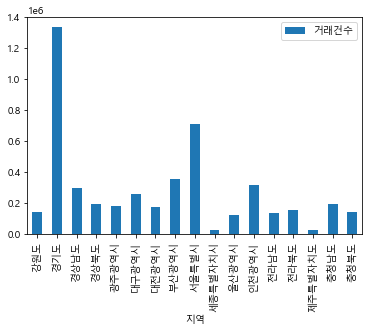

In [8]:
plt.rc('font', family='Malgun Gothic')
ax = data.plot.bar(x='지역', y='거래건수')
plt.show()

In [9]:
# 시계열 정보
time_table1 =[
    ['2012-08-01', '2012-12-31'],
    ['2013-01-01', '2013-12-31'],
    ['2014-01-01', '2014-12-31'],
    ['2015-01-01', '2015-12-31'],
    ['2016-01-01', '2016-12-31'],
    ['2017-01-01', '2017-12-31'],
    ['2018-01-01', '2018-12-31'],
    ['2019-01-01', '2019-12-31'],
    ['2020-01-01', '2020-07-31']]

time_table2 = [
    '2012', '2013', '2014', '2015', '2016',
    '2017', '2018', '2019', '2020']

In [10]:
region_table1 = [
    '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
    '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시',
    '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [11]:
# 지역별 평균 면적
def make_region_size():
    for year in time_table:

        query = f"""
            SELECT REGION, AVG(APT_SIZE)
            FROM APT_DEAL_PRICE
            GROUP BY REGION
            """

        que = get_data_from_db(query)

        if year == '2012':
            data = que.copy()
        else:
            data = data.merge(que)

    data.to_csv('data-files2/region_size.csv', index=False, encoding='utf-8-sig')

In [12]:
# make_region_size()

In [13]:
apt_size_mean = pd.read_csv('data-files2/region_size.csv')
apt_size_mean

,REGION,AVG(APT_SIZE)
0,전라남도,70.180932
1,제주특별자치도,69.283530
2,울산광역시,77.251163
3,경상북도,71.402030
4,대구광역시,80.739046
5,인천광역시,75.196776
6,강원도,67.972494
7,부산광역시,77.742547
8,충청북도,67.884089
9,충청남도,70.299182


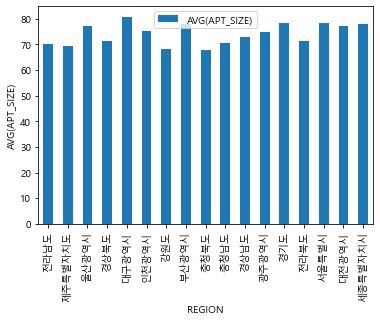

In [14]:
plt.rc('font', family='Malgun Gothic')
ax = apt_size_mean.plot.bar(x='REGION', rot=90)
ax.set(ylabel='AVG(APT_SIZE)')
plt.show()

In [15]:
# 지역별 평균 거래 가격
def make_region_price():
    for year in time_table:

        query = f"""
            SELECT REGION, AVG(CONTRACT_PRICE)
            FROM APT_DEAL_PRICE
            GROUP BY REGION
            """

        que = get_data_from_db(query)

        if year == '2012':
            data = que.copy()
        else:
            data = data.merge(que)

    data.to_csv('data-files2/region_price.csv', index=False, encoding='utf-8-sig')

In [16]:
# make_region_price()

In [17]:
pd.options.display.float_format='{:.0f}'.format

In [18]:
apt_price_mean = pd.read_csv('data-files2/region_price.csv')
apt_price_mean

,REGION,AVG(CONTRACT_PRICE)
0,전라남도,128951207
1,제주특별자치도,212702996
2,울산광역시,229934250
3,경상북도,138856796
4,대구광역시,260564110
5,인천광역시,249249389
6,강원도,128358638
7,부산광역시,260144003
8,충청북도,148687928
9,충청남도,158313744


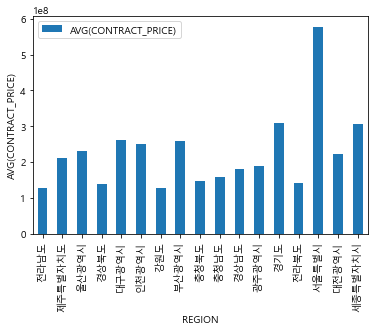

In [19]:
plt.rc('font', family='Malgun Gothic')
ax = apt_price_mean.plot.bar(x='REGION', rot=90)
ax.set(ylabel='AVG(CONTRACT_PRICE)')
plt.show()

In [20]:
def make_region_price_count():
    for year in time_table:

        query = f"""
            SELECT REGION, COUNT(*)
            FROM APT_DEAL_PRICE
            GROUP BY REGION
            """

        que = get_data_from_db(query)

        if year == '2012':
            data = que.copy()
        else:
            data = data.merge(que)

data.to_csv('data-files2/region_price_count.csv', index=False, encoding='utf-8-sig')

In [21]:
# make_region_price_count()


In [22]:
region_price_count = pd.read_csv('data-files2/region_price_count.csv')
region_price_count

,지역,거래건수
0,강원도,142353
1,경기도,1334713
2,경상남도,300502
3,경상북도,196949
4,광주광역시,183148
5,대구광역시,257323
6,대전광역시,176638
7,부산광역시,357755
8,서울특별시,714309
9,세종특별자치시,28056


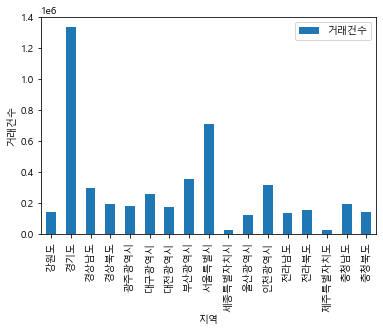

In [23]:
plt.rc('font', family='Malgun Gothic')
ax = region_price_count.plot.bar(x='지역', rot=90)
ax.set(ylabel='거래건수')
plt.show()

In [24]:
# 년도별 지역별 전체 매매건수
def make_region_deal_count():
    for year in time_table2:

        query = f"""
            SELECT adp.region, COUNT(*) AS y{year} 
            FROM apt_deal_price adp 
            WHERE TO_CHAR(adp.contract_date, 'YYYY') = '{year}' 
            GROUP BY adp.region 
            ORDER BY adp.region ASC
            """

        queD = get_data_from_db(query)

        if year == '2012':
            dataD = queD.copy()
        else:
            dataD = dataD.merge(queD)

    dataD.info()
    dataD.to_csv('data-files2/region_deal_count.csv', index=False, encoding='utf-8-sig')

In [25]:
# make_region_deal_count()

In [26]:
testD = pd.read_csv('data-files2/region_deal_count.csv')
testD

,REGION,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,강원도,6630,17830,19607,22038,20351,16608,12825,13914,12550
1,경기도,41582,147064,172370,200666,175042,154053,151747,141529,150660
2,경상남도,12818,39806,47725,48027,37483,30780,25463,33552,24848
3,경상북도,11594,29417,27867,27196,20114,20705,18861,22647,18548
4,광주광역시,8387,22310,25424,23859,21420,22764,25384,20135,13465
5,대구광역시,16495,39240,34041,32299,19047,32067,32582,30142,21410
6,대전광역시,6432,20935,20923,21186,22785,20283,19602,27390,17102
7,부산광역시,13255,42777,52758,62263,56409,37938,25857,36080,30418
8,서울특별시,18633,68136,85537,120023,110183,105063,81389,74917,50428
9,세종특별자치시,546,1130,1204,2033,3520,4669,3430,5802,5722


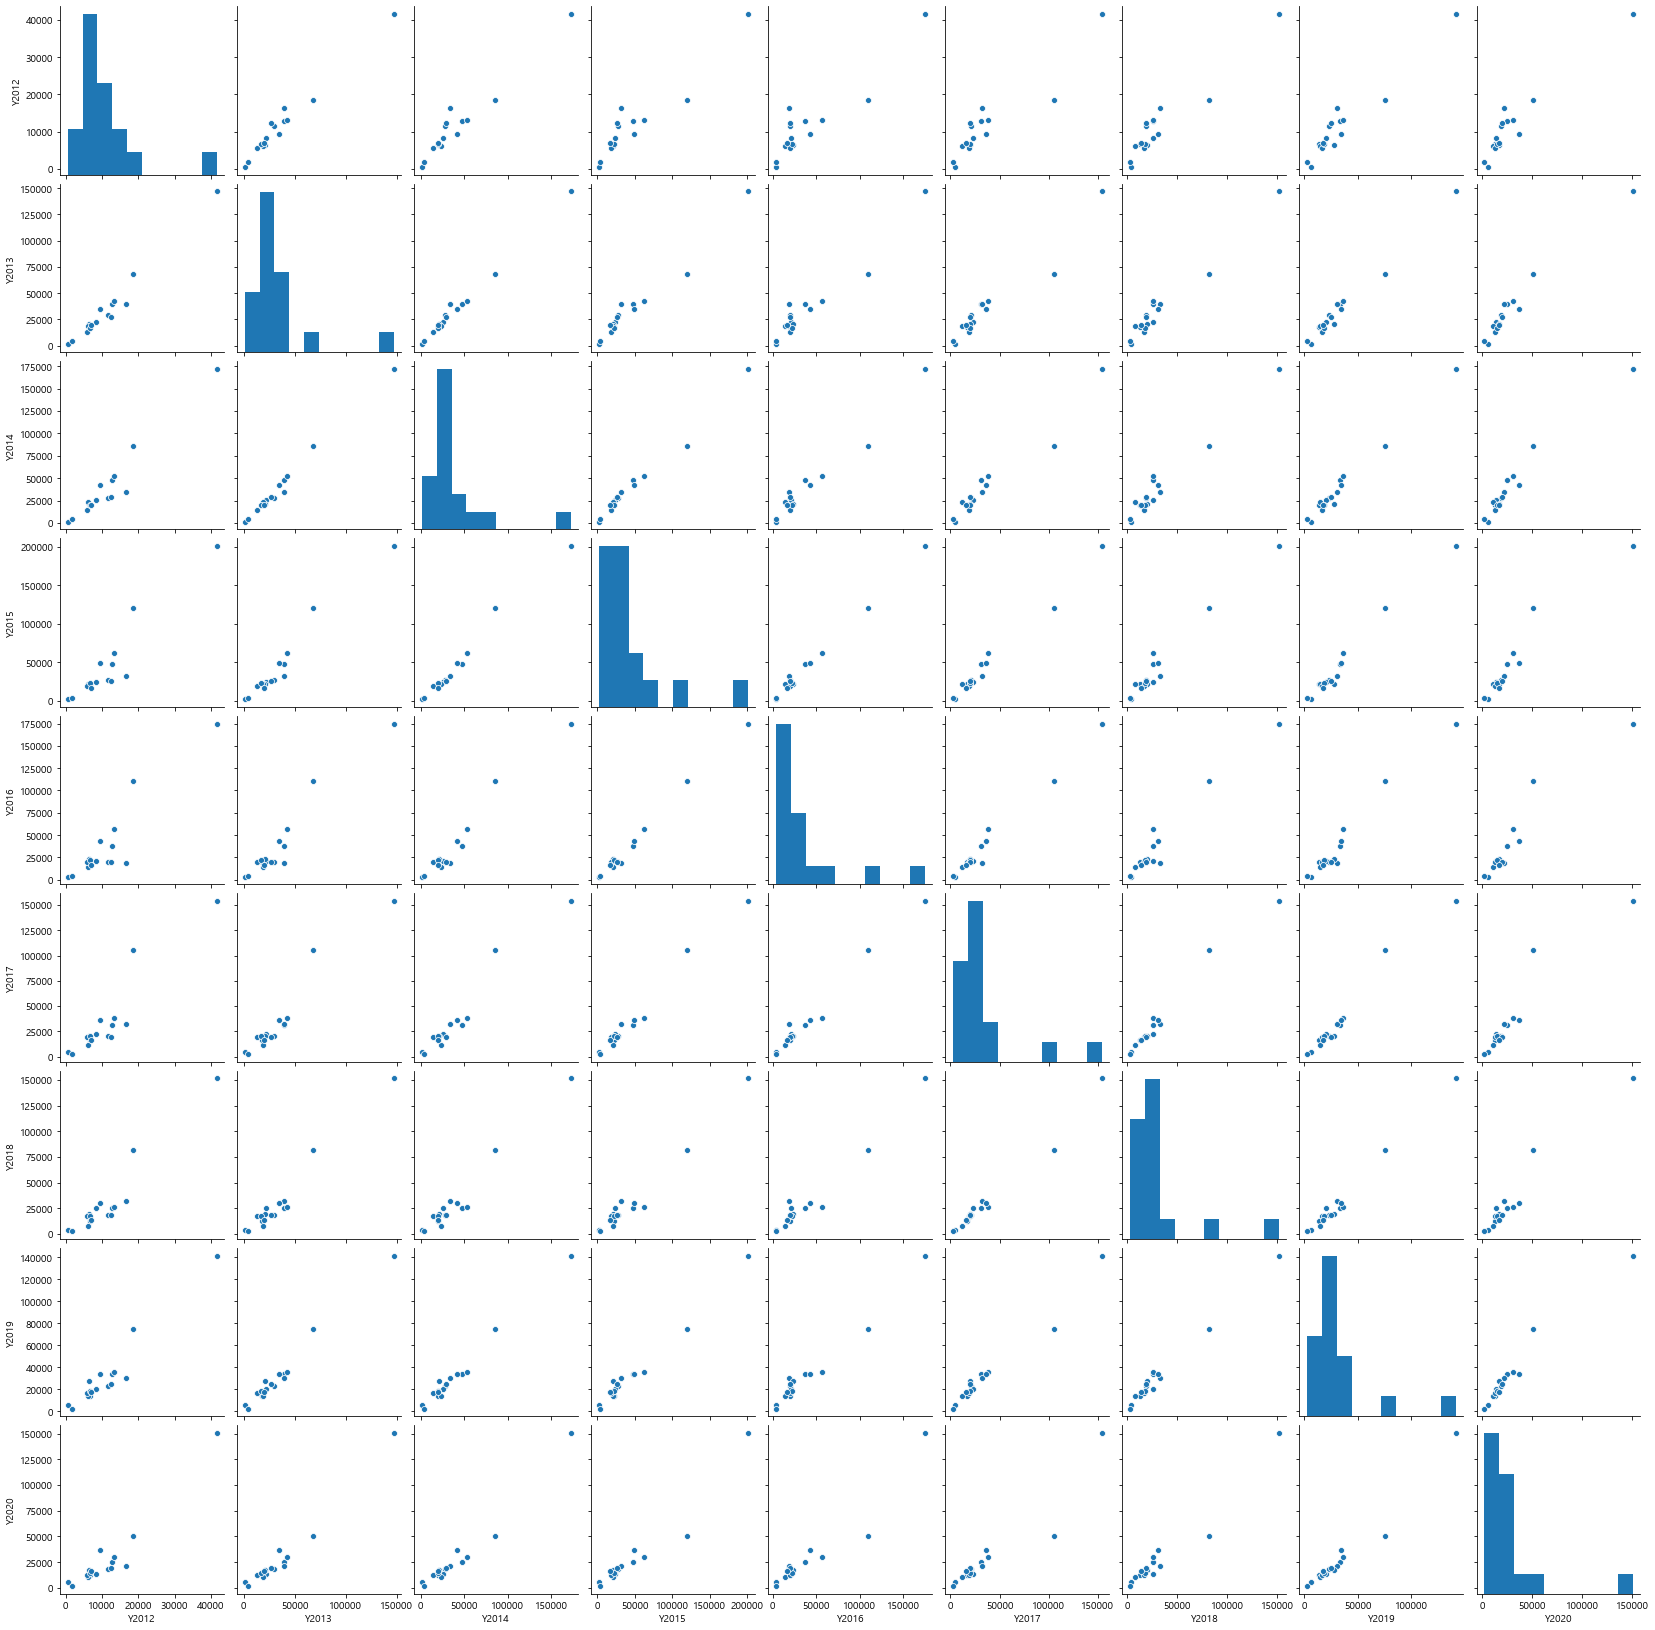

In [27]:
sns.pairplot(testD)
plt.show()

In [28]:
# 년도별 지역별 평균 평당 가격
def make_region_avg_price_per_pyung():
    for year in time_table2:

        query = f"""
            SELECT adp.region, round(AVG(adp.price_per_pyung)) AS y{year}
            FROM (SELECT A.region, (A.contract_price / (A.apt_size / 3.3)) price_per_pyung
                  FROM apt_deal_price A
                  WHERE to_char(A.contract_date, 'YYYY') = '{year}') adp
            GROUP BY adp.region
            ORDER BY adp.region ASC
            """

        queD = get_data_from_db(query)

        if year == '2012':
            dataD = queD.copy()
        else:
            dataD = dataD.merge(queD, how='left')

    dataD.info()
    lower_col = dataD.columns.values.tolist()
    dataD.columns = [ l.lower() for l in lower_col ]
    dataD.to_csv('data-files2/region_avg_price_per_pyung.csv', index=False, encoding='utf-8-sig')

In [29]:
# make_region_avg_price_per_pyung()

In [30]:
testD = pd.read_csv('data-files2/region_avg_price_per_pyung.csv')
testD

,region,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020
0,강원도,5017704,5073569,5244047,5697026,6288439,6610171,6572811,6470442,6895954
1,경기도,10268867,10721242,11194598,11861218,12768256,13887902,14639393,15421171,15659928
2,경상남도,7049242,7580157,8063321,8177517,8115336,8054941,7964061,8358840,9254155
3,경상북도,5154609,5510731,6015412,6365920,6152243,6295791,6194193,6360006,6903557
4,광주광역시,6159958,6387516,6988350,7665966,8172572,8712565,9219905,9511984,10086411
5,대구광역시,7630697,8177568,9304979,10538937,10625995,11316737,11834449,11919879,12458865
6,대전광역시,7994548,8229245,8379888,8445784,8762061,9130145,9834420,10633223,11737035
7,부산광역시,8955963,8681508,9182984,9920745,11047033,11730806,11791791,13086323,13951932
8,서울특별시,18912444,18659223,19201809,20206966,22287993,25421426,27119611,34400559,33660626
9,세종특별자치시,6241319,6168699,7381741,9044967,10432436,11415572,12988359,15411576,17264926


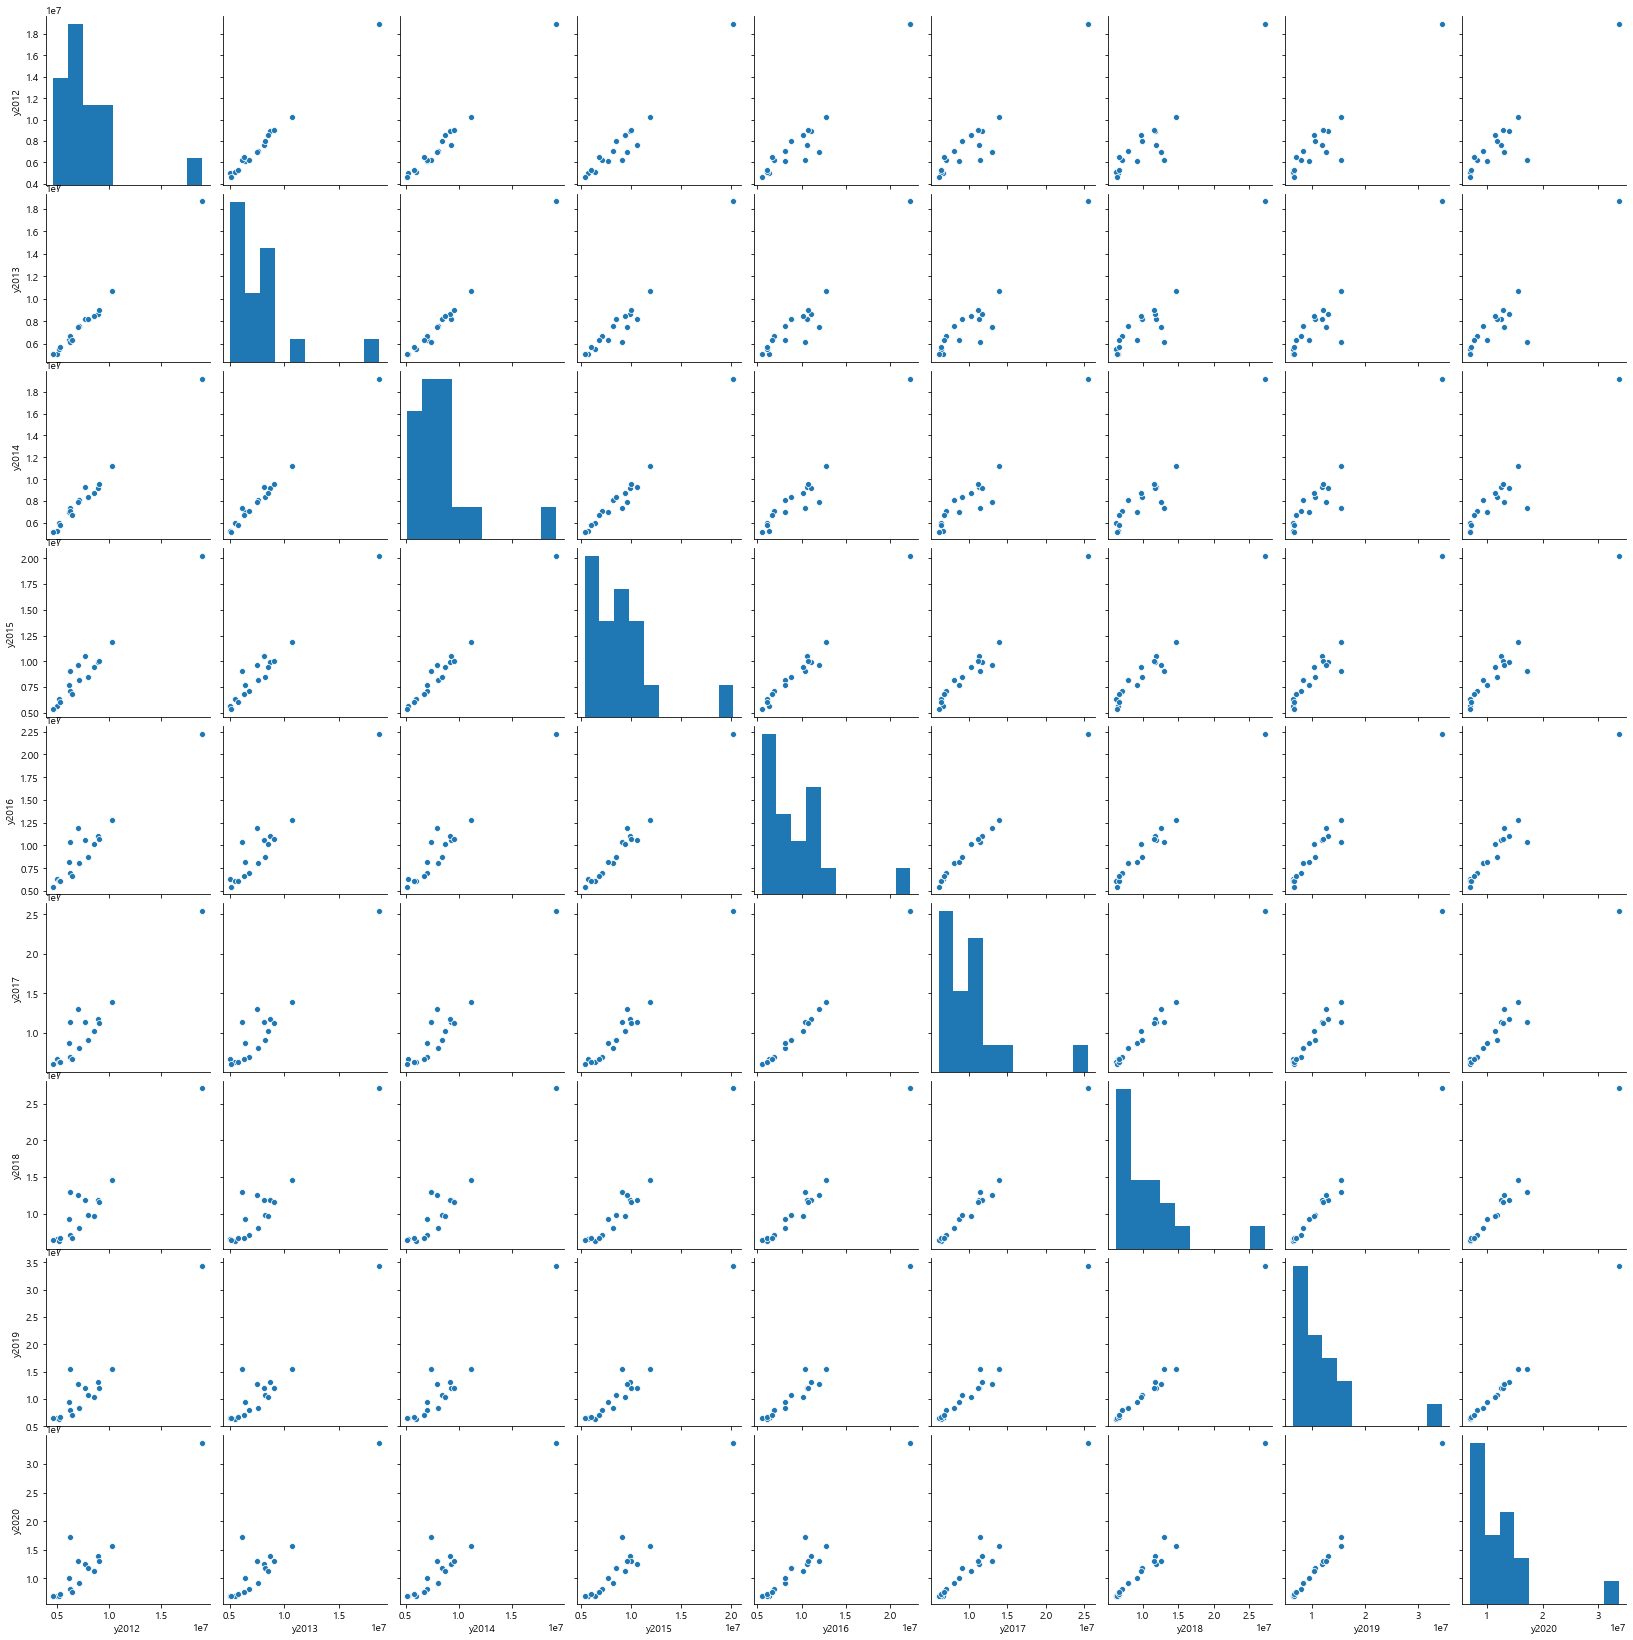

In [31]:
sns.pairplot(testD)
plt.show()